Submitted By: Sandeep Gopu     
Companie Name : Afame Technologies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Sales.csv')

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


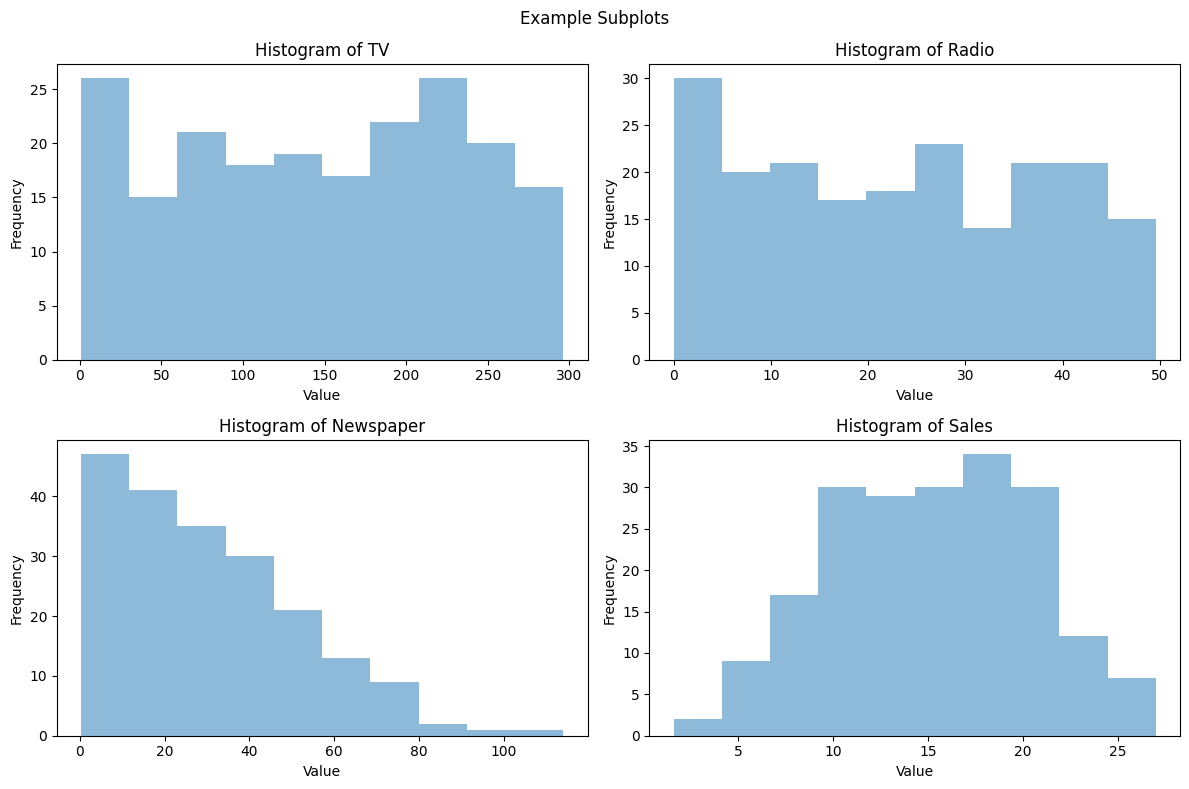

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

data['TV'].plot(ax=axes[0, 0], kind='hist', alpha=0.5)
axes[0,0].set_title('Histogram of TV')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Frequency')


data['Radio'].plot(ax=axes[0, 1], kind='hist', alpha=0.5)
axes[0, 1].set_title('Histogram of Radio')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')


data['Newspaper'].plot(ax=axes[1, 0], kind='hist', alpha=0.5)
axes[1, 0].set_title('Histogram of Newspaper')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')


data['Sales'].plot(ax=axes[1, 1], kind='hist', alpha=0.5)
axes[1, 1].set_title('Histogram of Sales')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')


fig.suptitle('Example Subplots')

plt.tight_layout()
plt.show()


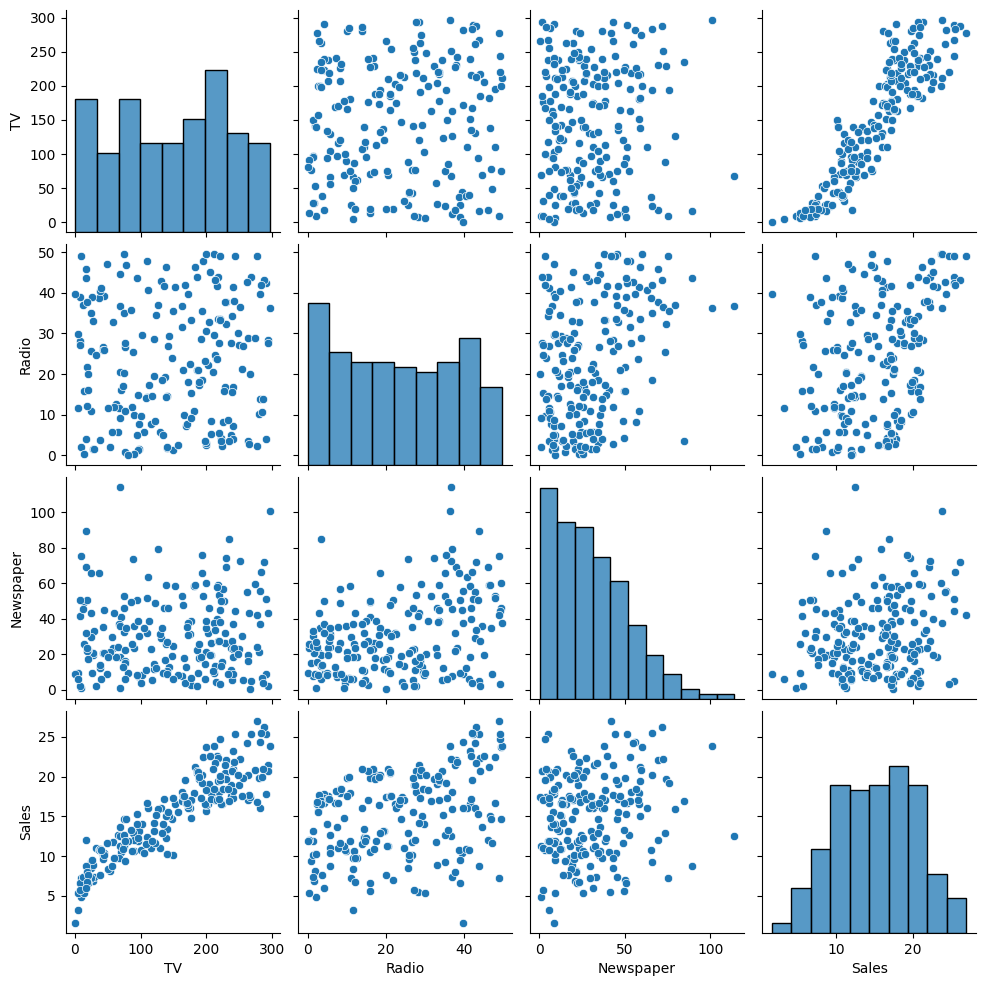

In [ ]:
sns.pairplot(data)
plt.show()

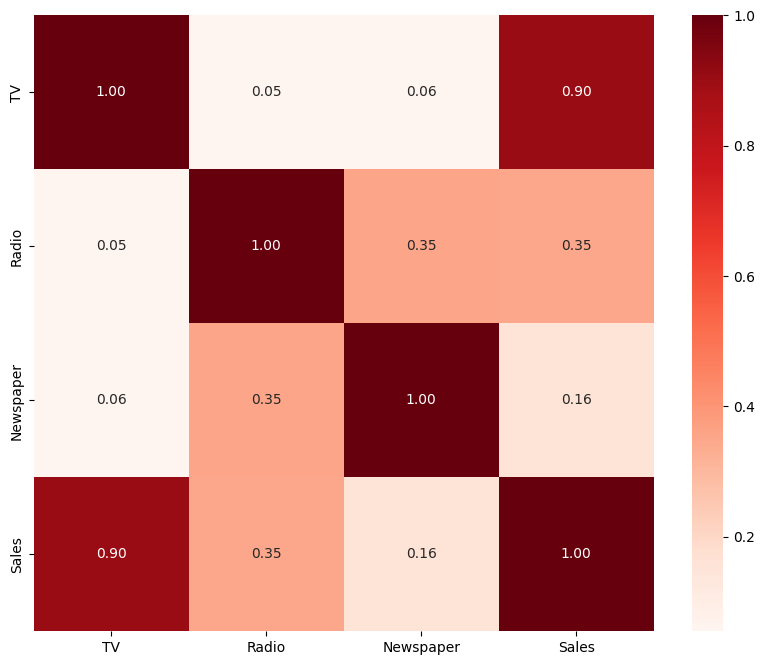

In [ ]:
# Exclude non-numeric columns from correlation calculation
numeric_sales = data.select_dtypes(include=['float64', 'int64'])

# Plotting a heatmap to show correlation between the variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_sales.corr(), annot=True, cmap="Reds", fmt=".2f")
plt.show()

In [ ]:
Y=data['Sales']
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
X=data.drop('Sales', axis = 1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [ ]:
Y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [ ]:
mse_lr=mean_squared_error(Y_test,Y_pred)
rmse_lr=np.sqrt(mse_lr)
print("Mean square error",mse_lr)
print("Root of mean square error",rmse_lr)


Mean square error 2.9077569102710896
Root of mean square error 1.7052146229349223


In [ ]:
de=DecisionTreeRegressor()
de.fit(X_train,Y_train)
y_pred=de.predict(X_test)
y_pred

array([17.5, 23.8, 19.6,  6.6, 23.8, 13.3, 22.6,  9.6, 16.6, 17.1,  4.8,
        9.7, 17.5,  6.6, 13.2, 17.9,  6.6, 17.3, 11.8, 20.7, 19.8, 13.3,
        9.5, 21.8, 10.5,  9.7, 22.6, 12.2, 10.4,  4.8, 16.4, 10.9, 23.8,
       12. , 20.1, 20.7, 10.4, 19.8, 12.2,  7.6])

In [ ]:
mse_de=mean_squared_error(Y_test,y_pred)
rmse_de=np.sqrt(mse_de)
print("Mean Square Error",mse_de)
print("Root of mean square error",rmse_de)

Mean Square Error 2.6552499999999997
Root of mean square error 1.6294937864257106


In [ ]:
xg=XGBRegressor()
xg.fit(X_train,Y_train)
xgb_pred=xg.predict(X_test)
xgb_pred

array([17.179169 , 22.748325 , 20.578192 ,  6.048757 , 23.73541  ,
       14.153012 , 23.15499  ,  9.174483 , 17.041319 , 16.30311  ,
        7.986717 ,  9.807733 , 17.305773 ,  4.1222224, 12.088081 ,
       16.510164 ,  4.040091 , 16.817339 , 11.620045 , 19.739996 ,
       20.458597 , 14.055775 , 10.093833 , 23.586964 , 11.256765 ,
        8.642781 , 23.066692 , 12.699838 , 10.635514 ,  5.959081 ,
       16.411547 , 11.606773 , 22.968414 ,  9.54043  , 20.582659 ,
       20.421392 , 12.6301365, 20.3205   , 12.758793 ,  6.6908307],
      dtype=float32)

In [ ]:
mse_xg=mean_squared_error(Y_test,xgb_pred)
rmse_xg=np.sqrt(mse_xg)
print("Mean square Error",mse_xg)
print("Root of mean square Error",rmse_xg)

Mean square Error 1.4514290545159532
Root of mean square Error 1.2047526943385323


In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
rf_pred

array([17.412, 22.335, 19.558,  6.554, 22.797, 13.516, 22.58 ,  9.851,
       16.792, 16.87 ,  7.403, 10.136, 17.289,  4.873, 11.629, 16.999,
        6.401, 17.513, 11.582, 19.876, 19.849, 13.39 , 10.002, 22.09 ,
       11.1  ,  9.897, 22.722, 12.579, 11.448,  5.226, 16.644, 11.29 ,
       22.83 ,  9.765, 19.839, 20.246, 11.731, 19.494, 12.383,  7.522])

In [ ]:
rf_mse=mean_squared_error(Y_test,rf_pred)
rf_rmse=np.sqrt(rf_mse)
print("mean square error",rf_mse)
print("Root of mean square Error",rf_rmse)

mean square error 1.4620058250000056
Root of mean square Error 1.2091343287658347


In [ ]:
num_periods=10

In [ ]:
new_data=pd.DataFrame({
    'TV': np.random.uniform(low=0, high=300, size=num_periods),
    'Radio' : np.random.uniform(low=0, high=50, size=num_periods),
    'Newspaper': np.random.uniform(low=0, high=100, size=num_periods),
})

In [ ]:
print("New Advertising Expenditures Data:")
print(new_data)
new_data_1 = pd.DataFrame({'TV': (300, 350, 400), 'Radio': (10, 40, 20), 'Newspaper': (50, 25, 30)})


New Advertising Expenditures Data:
           TV      Radio  Newspaper
0  144.149996  47.486580  35.177163
1   52.972034  20.235860  87.199350
2   87.363408  21.775716  76.521794
3   64.395290  48.129062  68.279135
4   95.606171   9.617821  36.806575
5  156.627785  11.354703  96.938667
6  290.886297  39.021262  71.350307
7  175.619543  25.964184  61.988994
8  162.809636  13.428594  75.854579
9  285.112869  30.543605  99.799049


In [ ]:
sales_forecast=xg.predict(new_data)
for i, forecast in enumerate(sales_forecast):
  print(f'period {i+1}: {forecast:.2f}')

sales_forecast1 = xg.predict(new_data_1)
print(sales_forecast1)

period 1: 16.52
period 2: 10.03
period 3: 12.92
period 4: 13.58
period 5: 11.77
period 6: 17.06
period 7: 23.80
period 8: 16.73
period 9: 17.09
period 10: 20.78
[18.200573 23.829535 20.430822]
